# Farhanul Khair - 2208107010076

### Import required library

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load the dataset (CIFAR-10)

In [34]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data by dividing each element by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split the data into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [35]:
# show the fiture and label of the data
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)
(10000, 32, 32, 3) (10000, 1)


### Filtering the data (Cat and Dog)

In [36]:
# Filter data to include only classes for cats (3) and dogs (5)
# Classes: cats (3) and dogs (5)
train_filter = (y_train.flatten() == 3) | (y_train.flatten() == 5)
test_filter = (y_test.flatten() == 3) | (y_test.flatten() == 5)

# Filter the data and labels
x_train_filtered = x_train[train_filter]
y_train_filtered = y_train[train_filter]
x_test_filtered = x_test[test_filter]
y_test_filtered = y_test[test_filter]

# Convert class 3 to 0 (cat) and class 5 to 1 (dog)
y_train_filtered = (y_train_filtered.flatten() == 5).astype(int)  # Cat = 0, Dog = 1
y_test_filtered = (y_test_filtered.flatten() == 5).astype(int)  # Cat = 0, Dog = 1

In [37]:
# Count the number of samples for each class
num_cats = (y_train_filtered == 0).sum()
num_dogs = (y_train_filtered == 1).sum()

# Display the number of samples
print(f"Number of cat samples (label 0): {num_cats}")
print(f"Number of dog samples (label 1): {num_dogs}")


Number of cat samples (label 0): 3977
Number of dog samples (label 1): 3985


### Visualize the data

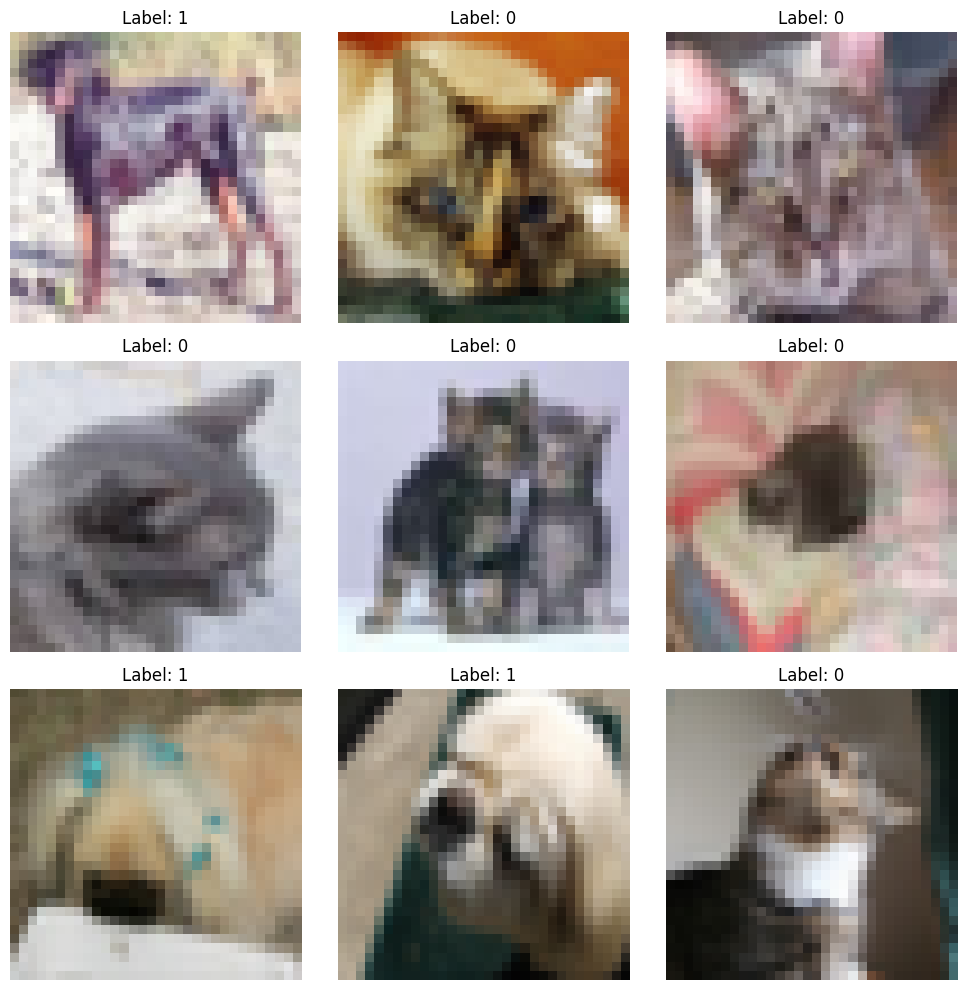

In [38]:
# Function to visualize multiple images
def plot_images(images, labels, num_examples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_examples):
        plt.subplot(3, 3, i + 1)  # Arrange in a 3x3 grid
        plt.imshow(images[i])  # Display color image
        plt.title(f"Label: {labels[i]}")  # Display label 0 or 1
        plt.axis('off')  # Remove axes
    plt.tight_layout()
    plt.show()

# Show 9 examples from the filtered training dataset
plot_images(x_train_filtered, y_train_filtered)

### Build the Model

In [39]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output binary (dog vs cat)
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

### Compile dan Train the model

In [40]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_filtered, y_train_filtered, 
                    epochs=10, 
                    validation_data=(x_val, y_val))

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5651 - loss: 0.6775 - val_accuracy: 0.0958 - val_loss: 0.0299
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6646 - loss: 0.6102 - val_accuracy: 0.1123 - val_loss: 1.4702
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6995 - loss: 0.5737 - val_accuracy: 0.1030 - val_loss: 3.8920
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7261 - loss: 0.5350 - val_accuracy: 0.1169 - val_loss: 0.9486
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7598 - loss: 0.4998 - val_accuracy: 0.1126 - val_loss: 1.5807
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7700 - loss: 0.4786 - val_accuracy: 0.1188 - val_loss: 1.1940
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7884 - loss: 0.4453 - val_accuracy: 0.1142 - val_loss: 3.2022
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8038 - loss: 0.4195 - val_accu

### Analyzing Model Performance During Training"

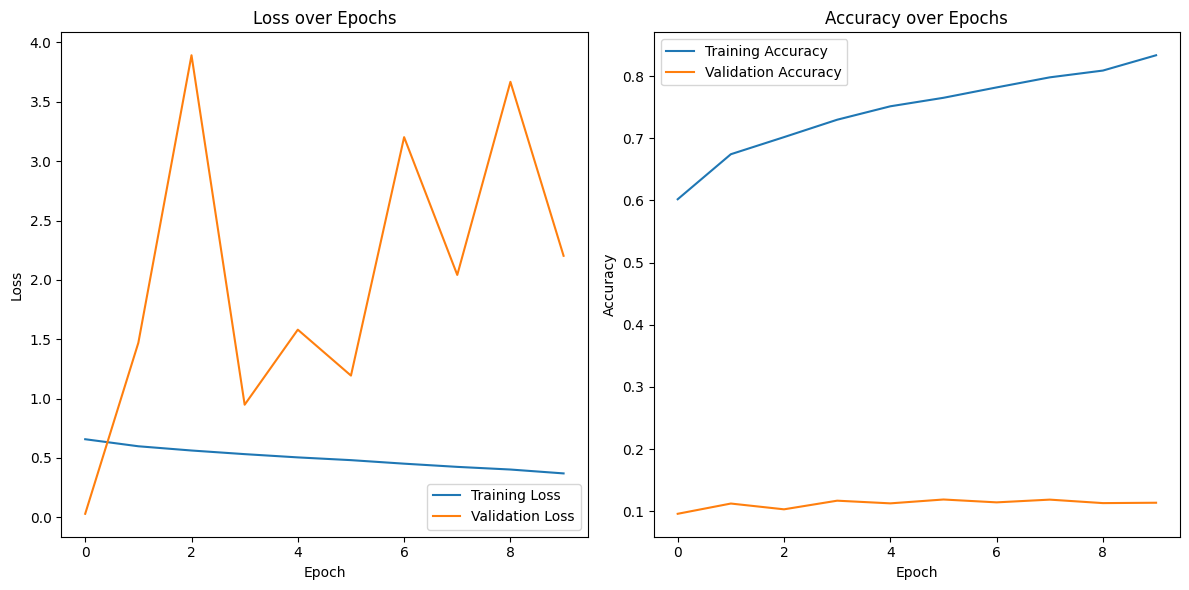

In [41]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()  # Ensures plots don't overlap
plt.show()

### Evaluate the Model

In [42]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_filtered, y_test_filtered, verbose=2)

# Display the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


63/63 - 0s - 6ms/step - accuracy: 0.7465 - loss: 0.5280
Test Loss: 0.5280
Test Accuracy: 0.7465


In [43]:
# Save the model
model.save('cats_vs_dogs_model.h5')